#  Multi-class Classification


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Variable Name</th>
    <th class="tg-7zrl">Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Has a family member suffered or suffers from overweight?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you eat high caloric food frequently?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">Do you usually eat vegetables in your meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How many main meals do you have daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Do you eat any food between meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you smoke?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How much water do you drink daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you monitor the calories you eat daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How often do you have physical activity?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">How often do you drink alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Which transportation do you usually use?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Obesity level</td>
  </tr>
</tbody></table>


### Load the dataset

Load the data set by executing the code cell below.


In [105]:

data = pd.read_csv("Obesity_level_prediction_dataset.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Exploratory Data Analysis


Visualize the distribution of the target variable to understand the class balance.


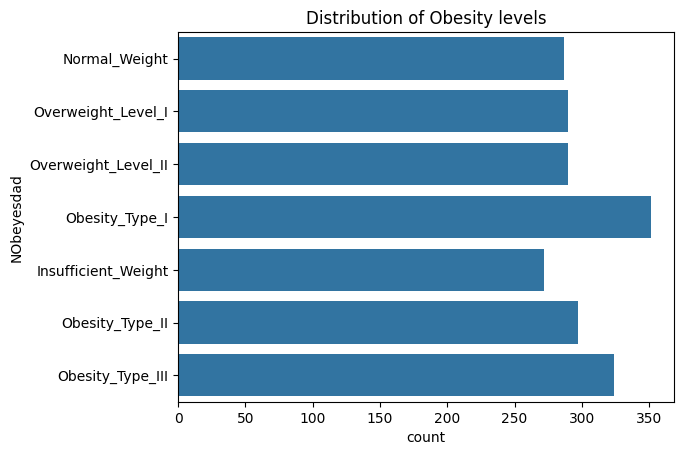

In [106]:
# Distribution of target variable Obesity levels
sns.countplot(y = 'NObeyesdad',data=data)
plt.title('Distribution of Obesity levels')
plt.show()


This shows that the dataset is fairly balanced and does not require any special attention in terms of biased training.


In [107]:
# your code here
print(data.isnull().sum())
print(data.describe())
print(data.dtypes)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%  

## Preprocessing the data


### Feature scaling
Scale the numerical features to standardize their ranges for better model performance.


In [108]:
# find the continuous columns
continuous_columns = data.select_dtypes(include = ['float64']).columns.tolist()
# converting the numpy numbers
scalar = StandardScaler()
scaled_features = scalar.fit_transform(data[continuous_columns])
# convert to data frame and give the numbers columns name
scaled_data_frames = pd.DataFrame(scaled_features, columns = scalar.get_feature_names_out(continuous_columns))
# connect the data frames
scaled_data = pd.concat([data.drop(columns = continuous_columns), scaled_data_frames], axis = 1)


Standardization of data is important to better define the decision boundaries between classes by making sure that the feature variations are in similar scales. The data is now ready to be used for training and testing.


### One-hot encoding
Convert categorical variables into numerical format using one-hot encoding.


In [109]:
# define the columns we are gonna to prepross
one_code_columns = data.select_dtypes(include = ['object']).columns.tolist()
one_code_columns.remove('NObeyesdad')
# get the numbers after one hot encoder
one_code = OneHotEncoder(sparse_output= False, drop = 'first' )
one_code_features = one_code.fit_transform(data[one_code_columns])
# convert the numbers to dataframe
one_code_dataframe = pd.DataFrame(one_code_features, columns = one_code.get_feature_names_out(one_code_columns))
prepped_data = pd.concat([scaled_data.drop(columns = one_code_columns),one_code_dataframe],axis = 1)

### Encode the target variable


In [110]:
# Encoding the target variable

prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()
#prepped_data['Age'].describe() we can see every float64's mean is 0, SD is 1

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Separate the input and target data


In [111]:
# Preparing final dataset
X = prepped_data.drop(['NObeyesdad'],axis = 1)
Y = prepped_data['NObeyesdad']

## Model training and evaluation 


### Splitting the data set
Split the data into training and testing subsets.


In [114]:
# Splitting data
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify= Y, random_state= 41)

### Logistic Regression with One-vs-All
In the One-vs-All approach:

* The algorithm trains a single binary classifier for each class.
* Each classifier learns to distinguish a single class from all the others combined.
* If there are k classes, k classifiers are trained.
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

#### Advantages:
* Simpler and more efficient in terms of the number of classifiers (k)
* Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).

#### Disadvantages:
* Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest.
* Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class.


Train a logistic regression model using the One-vs-All strategy and evaluate its performance.


In [118]:
# Training logistic regression model using One-vs-All (default)
ovr_model = LogisticRegression(multi_class = 'ovr')
ovr_model.fit(X_test,Y_test)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


You can now evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.


In [126]:
prediction_ovr = ovr_model.predict(X_test)

# calculate Accuracy
print("One vs Rest Accuracy:")
print(f"{(np.round(accuracy_score(Y_test,prediction_ovr),2)*100)}%")

One vs Rest Accuracy:
76.0%


### Logistic Regression with OvO

In the One-vs-One approach:
* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in $k(k-1)/2$ classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

#### Advantages:
* Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes).
* Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.

#### Disadvantages:
* Computationally expensive for datasets with a large number of classes due to the large number of classifiers required.
* May lead to ambiguous predictions if voting results in a tie.


Train a logistic regression model using the One-vs-One (OvO) strategy and evaluate its performance.


In [124]:
# Training logistic regression model using One-vs-One
ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(X_test,Y_test)

,estimator,LogisticRegression()
,n_jobs,None
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'


Evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.


In [133]:
# Predictions
ovo_prediction = ovo_model.predict(X_test)

# check for Accuracy
print("OneVsOne model Accuracy:")
print(f"{np.round(accuracy_score(Y_test,ovo_prediction),2)*100} %") 

OneVsOne model Accuracy:
92.0 %


BY above, we can easily see in this 6 categories model, OVO will be better and have a higher Accuracy.

Q1. Experiment with different test sizes in the train_test_split method (e.g., 0.1,0.2, 0.3) and observe the impact on model performance.


In [ ]:

for text_size in (0.1,0.2,0.3):
    X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = text_size, stratify= Y, random_state= 41)
    ovo_model.fit(X_train,Y_train)
    ovo_prediction = ovo_model.predict(X_test)
    print(f"OneVsOne model Accuracy for {text_size} :")
    print(f"{np.round(accuracy_score(Y_test,ovo_prediction),2)*100} %") 



OneVsOne model Accuracy for 0.1 :
94.0 %
OneVsOne model Accuracy for 0.2 :
92.0 %
OneVsOne model Accuracy for 0.3 :
92.0 %


Q2. Plot a bar chart of feature importance using the coefficients from the One vs All logistic regression model. Also try for the One vs One model.


By, this question: we can visualize which featrues will effect our prediciton more.

Text(0, 0.5, 'Features')

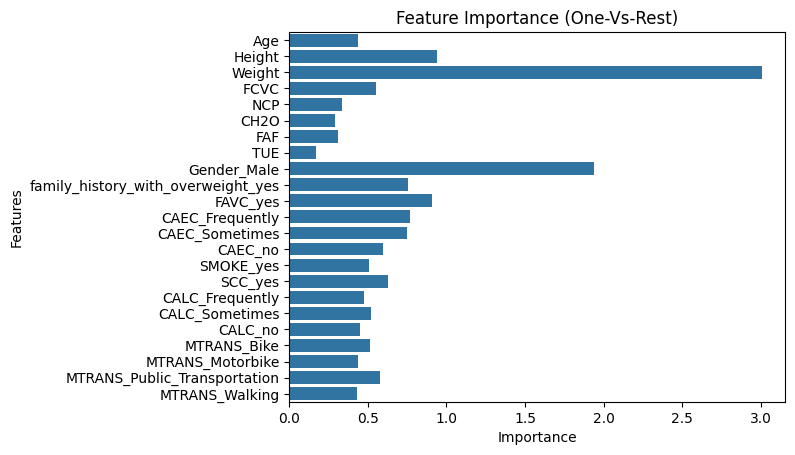

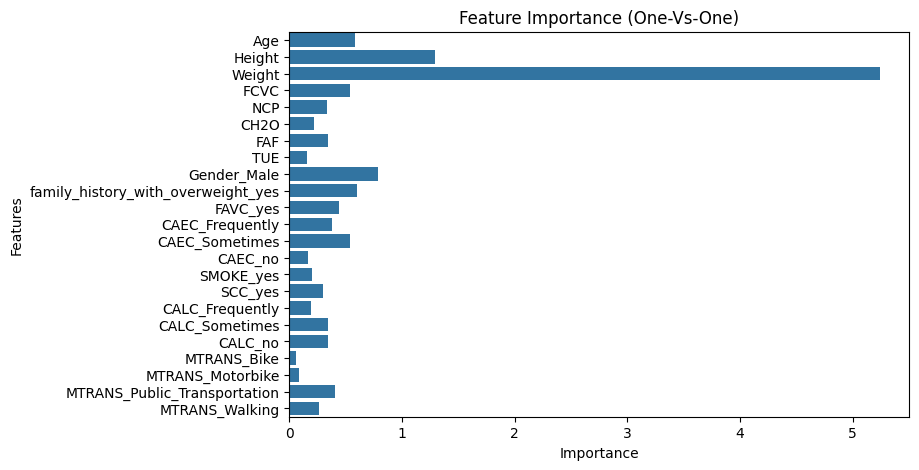

In [155]:
# For One vs Rest model
feature_importance_ovr = np.mean(np.abs(ovr_model.coef_),axis=0)
sns.barplot(x=feature_importance_ovr, y = X.columns)
plt.title('Feature Importance (One-Vs-Rest)')
plt.xlabel('Importance')
plt.ylabel('Features')

# For One vs One model
# we need to first get the whole array of 15 models coef_
ovo_coef_array = np.array([i.coef_[0] for i in ovo_model.estimators_])
feature_importance_ovo = np.mean(np.abs(ovo_coef_array),axis=0)
plt.figure(figsize= (8,5))
sns.barplot(x=feature_importance_ovo, y = X.columns)
plt.title('Feature Importance (One-Vs-One)')
plt.xlabel('Importance')
plt.ylabel('Features')



Q3. Write a function `obesity_risk_pipeline` to automate the entire pipeline: <br>
<ol>
<li> Loading and preprocessing the data </li>
<li> Training the model </li>
<li> Evaluating the model </li>
</ol>
The function should accept the file path and test set size as the input arguments.


In [157]:
# write your function here and then execute this cell
def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
   
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Training and evaluation
    model = OneVsOneClassifier(LogisticRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Call the pipeline function with file_path
obesity_risk_pipeline("Obesity_level_prediction_dataset.csv", test_size=0.2)

Accuracy: 0.9219858156028369
